<a href="https://colab.research.google.com/github/5quidL0rd/Algorithm-Development/blob/main/Reconnecting_the_Dots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating the Graph

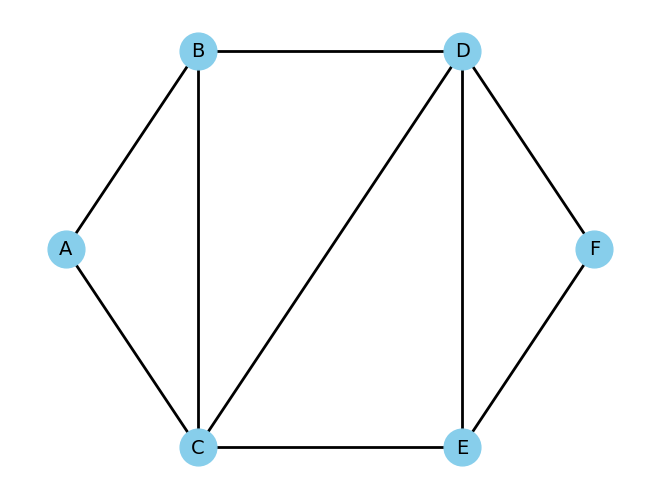

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

graph = {'A': ['B', 'C'],
         'B': ['A', 'C', 'D'],
         'C': ['A', 'B', 'D', 'E'],
         'D': ['B', 'C', 'E', 'F'],
         'E': ['C', 'D', 'F'],
         'F': ['D', 'E']}

Graph = nx.Graph()
for node in graph:
    Graph.add_node(node)
    for edge in graph[node]:
        Graph.add_edge(node, edge)

pos = {'A': [0.00, 0.50], 'B': [0.25, 0.75],
       'C': [0.25, 0.25], 'D': [0.75, 0.75],
       'E': [0.75, 0.25], 'F': [1.00, 0.50]}

draw_params = {'with_labels': True,
               'node_color': 'skyblue',
               'node_size': 700, 'width': 2,
               'font_size': 14}

nx.draw(Graph, pos, **draw_params)
plt.show()

# Breadth-First Search

In [19]:
def bfs(graph, start):
    queue = [start]
    queued = [start]
    path = list()
    while queue:
        print('Queue is: %s' % queue)
        vertex = queue.pop(0)
        print('Processing %s' % vertex)
        for candidate in graph[vertex]:
            if candidate not in queued:
                queued.append(candidate)
                queue.append(candidate)
                path.append(vertex + '>' + candidate)
                print('Adding %s to the queue' % candidate)
    return path

graph = {'A': ['B', 'C'],
         'B': ['A', 'C', 'D'],
         'C': ['A', 'B', 'D', 'E'],
         'D': ['B', 'C', 'E', 'F'],
         'E': ['C', 'D', 'F'],
         'F': ['D', 'E']}

steps = bfs(graph, 'A')
print('\nBFS:', steps)
print('\n')

steps = bfs(graph, 'B')
print('\nBFS:', steps)


Queue is: ['A']
Processing A
Adding B to the queue
Adding C to the queue
Queue is: ['B', 'C']
Processing B
Adding D to the queue
Queue is: ['C', 'D']
Processing C
Adding E to the queue
Queue is: ['D', 'E']
Processing D
Adding F to the queue
Queue is: ['E', 'F']
Processing E
Queue is: ['F']
Processing F

BFS: ['A>B', 'A>C', 'B>D', 'C>E', 'D>F']


Queue is: ['B']
Processing B
Adding A to the queue
Adding C to the queue
Adding D to the queue
Queue is: ['A', 'C', 'D']
Processing A
Queue is: ['C', 'D']
Processing C
Adding E to the queue
Queue is: ['D', 'E']
Processing D
Adding F to the queue
Queue is: ['E', 'F']
Processing E
Queue is: ['F']
Processing F

BFS: ['B>A', 'B>C', 'B>D', 'C>E', 'D>F']


# Applying Depth-First Search

In [21]:
def dfs(graph, start):
    stack = [start]
    parents = {start: start}
    path = list()
    while stack:
        print('Stack is: %s' % stack)
        vertex = stack.pop()
        print('Processing %s' % vertex)
        for candidate in graph[vertex]:
            if candidate not in parents:
                parents[candidate] = vertex
                stack.append(candidate)
                print('Adding %s to the stack' % candidate)
        if vertex != start:
            path.append(parents[vertex] + '>' + vertex)
    return path

graph = {'A': ['B', 'C'],
         'B': ['A', 'C', 'D'],
         'C': ['A', 'B', 'D', 'E'],
         'D': ['B', 'C', 'E', 'F'],
         'E': ['C', 'D', 'F'],
         'F': ['D', 'E']}

steps = dfs(graph, 'A')
print('\nDFS:', steps)

Stack is: ['A']
Processing A
Adding B to the stack
Adding C to the stack
Stack is: ['B', 'C']
Processing C
Adding D to the stack
Adding E to the stack
Stack is: ['B', 'D', 'E']
Processing E
Adding F to the stack
Stack is: ['B', 'D', 'F']
Processing F
Stack is: ['B', 'D']
Processing D
Stack is: ['B']
Processing B

DFS: ['A>C', 'C>E', 'E>F', 'C>D', 'A>B']


Minimum Spanning Tree

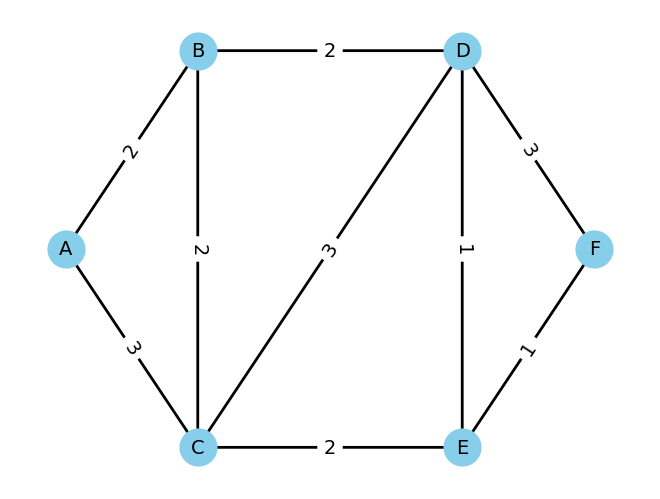

In [29]:
import networkx as nx
import matplotlib.pyplot as plt

graph = {'A': {'B': 2, 'C': 3},
         'B': {'A': 2, 'C': 2, 'D': 2},
         'C': {'A': 3, 'B': 2, 'D': 3, 'E': 2},
         'D': {'B': 2, 'C': 3, 'E': 1, 'F': 3},
         'E': {'C': 2, 'D': 1, 'F': 1},
         'F': {'D': 3, 'E': 1}}

Graph = nx.Graph()
for node in graph:
  Graph.add_nodes_from(node)
  for edge, weight in graph[node].items():
    Graph.add_edge(node,edge, weight=weight)

pos = { 'A' : [0.00, 0.50], 'B': [0.25, 0.75],
       'C': [0.25, 0.25], 'D': [0.75, 0.75],
        'E': [0.75, 0.25], 'F': [1.00, 0.50]}

draw_params = {'with_labels' : True,
               'arrows': True,
               'node_color': 'skyblue',
               'node_size': 700, 'width':2,
               'font_size': 14}

labels = nx.get_edge_attributes(Graph, 'weight')
nx.draw(Graph, pos, **draw_params)
nx.draw_networkx_edge_labels(Graph, pos,
                             font_size=14,
                             edge_labels=labels)

plt.show()


Algorithms for solving a minimum spanning tree:

Boruvka's: Relies on a series of stages in whcih it identifies the edges with the smallest weight in each stage. The calculations begin by looking at individual vertexes, finding the smallest weight for that vertex, and then combining paths to form forests of individual trees until it creates a path that combines all the forests with the smallest weight.

Prim's: Starts with an arbitrary vertex and grows the minimum spanning tree one edge at a time by always choosing the edge with the least weight that connects to a node that isn't already in the tree to the growing tree.

Kruskal's: Uses an approach that combines both above. Does this by creating a forests of indivdual trees and then looking for the minimum edge for each vertex and building the forests one edge at a time.

# Priority Queue

In [35]:
from heapq import heapify, heappop, heappush

class priority_queue():
    def __init__(self):
        self.queue = list()
        heapify(self.queue)
        self.index = dict()

    def push(self, priority, label):
        if label in self.index:
            self.queue = [(w, l) for w, l in self.queue if l != label]
            heapify(self.queue)
        heappush(self.queue, (priority, label))

    def pop(self):
        if self.queue:
            return heappop(self.queue)

    def __contains__(self, label):
        return label in self.index

    def __len__(self):
        return len(self.queue)

Prim's Algorithm

Works by:
1. Track both the edges of the minimum spanning tree and the used vertexes as they become part of the solution.
2. Start from any vertex in the graph and place it into the solution
3. Determine whether there are still vertexes that aren't part of the solution:
a. Enumerate the edges that touch the vertexes in the solution.
b. Insert the edge with the minimum weight into the spanning tree.

In [43]:
def prim(graph, start):
    treepath = {}
    total = 0
    queue = priority_queue()
    queue.push(0, (start, start))
    while queue:
        weight, (node_start, node_end) = queue.pop()
        if node_end not in treepath:
            treepath[node_end] = node_start
            if weight:
                print("Added edge from %s to %s weighting %i" % (node_start, node_end, weight))
            total += weight
            for next_node, next_weight in graph[node_end].items():
                queue.push(next_weight, (node_end, next_node))
    print("Total spanning tree length: %i" % total)
    return treepath

treepath = prim(graph, 'A')

Added edge from A to B weighting 2
Added edge from B to C weighting 2
Added edge from B to D weighting 2
Added edge from D to E weighting 1
Added edge from E to F weighting 1
Total spanning tree length: 8


Kruskal's algorithm

Works by:
1. Put all the edges into a heap and sort them so that the shortest edges are on top.
2. Create a set of trees, each one containing only one vertex (so that the number of trees is the same number as the vertexes) You conect trees as an aggregate until the trees converge intoa  tree of minimal length that spans all the vertexes.
3. Repeat the following operations until the solution doesn't contain as many edges as the number of vertexes in the graph:
a. Choose the shortest edge from the heap.
b. Determine whether the two vertexes connected by the edge appear in different trees from among the set of connected trees.
c. When the trees differ, connect the trees using the edge
d. When the vertexes appear int he same tree, discard the edge
e. Repeat steps a through d for the remaining edges on the heap

In [46]:
def kruskal(graph):
    priority = priority_queue()
    print("Pushing all edges into the priority queue")
    treepath = list()
    connected = dict()
    for node in graph:
        connected[node] = [node]
        for dest, weight in graph[node].items():
            priority.push(weight, (node, dest))
    print("totally %i edges" % len(priority.queue))
    print("Connected components: %s" % connected.values())

    total = 0
    while len(treepath) < (len(graph) - 1):
        weight, (start, end) = priority.pop()
        if end not in connected[start]:
            treepath.append((start, end))
            print("Summing %s and %s components:" % (connected[start], connected[end]))
            print("\tadded edge from %s to %s weighting %i" % (start, end, weight))
            total += weight
            connected[start] += connected[end][:]
            for element in connected[end]:
                connected[element] = connected[start]
    print("Total spanning tree length: %i" % total)
    return sorted(treepath, key=lambda x: x[0])

print('\nMinimum spanning tree:', kruskal(graph))

Pushing all edges into the priority queue
totally 18 edges
Connected components: dict_values([['A'], ['B'], ['C'], ['D'], ['E'], ['F']])
Summing ['D'] and ['E'] components:
	added edge from D to E weighting 1
Summing ['D', 'E'] and ['F'] components:
	added edge from E to F weighting 1
Summing ['A'] and ['B'] components:
	added edge from A to B weighting 2
Summing ['A', 'B'] and ['C'] components:
	added edge from B to C weighting 2
Summing ['A', 'B', 'C'] and ['D', 'E', 'F'] components:
	added edge from B to D weighting 2
Total spanning tree length: 8

Minimum spanning tree: [('A', 'B'), ('B', 'C'), ('B', 'D'), ('D', 'E'), ('E', 'F')]


# Dijkstra's Algorithm

In [52]:
import networkx as nx
import matplotlib.pyplot as plt

def dijkstra(graph, start, end):
    inf = float('inf')
    known = set()
    priority = priority_queue()
    path = {start: start}
    distance = {node: inf for node in graph}

    distance[start] = 0
    priority.push(0, start)

    while priority:
        weight, actual_node = priority.pop()
        if actual_node not in known:
            for next_node, edge_weight in graph[actual_node].items():
                to_next = distance[actual_node] + edge_weight
                if to_next < distance[next_node]:
                    distance[next_node] = to_next
                    priority.push(to_next, next_node)
                    path[next_node] = actual_node
            known.add(actual_node)

    return distance, path

ngraph = {'A': {'B': 2, 'C': 3},
         'B': {'A': 2, 'C': 2, 'D': 2},
         'C': {'A': 3, 'B': 2, 'D': 3, 'E': 2},
         'D': {'B': 2, 'C': 3, 'E': 1, 'F': 3},
         'E': {'C': 2, 'D': 1, 'F': 1},
         'F': {'D': 3, 'E': 1}}

dist, path = dijkstra(ngraph, 'A', 'F')
print("Shortest distance:", dist['F'])
print("Shortest path:", path)

Shortest distance: 6
Shortest path: {'A': 'A', 'B': 'A', 'C': 'A', 'D': 'B', 'E': 'C', 'F': 'E'}


# Bellman-Ford Algorithm

In [53]:
def bellman_ford(graph, start):
  inf = float('inf')
  distance = {node: inf if node != start else 0.0 for node in graph}
  previous = {node: None for node in graph}

  for actual_node in graph:
    for next_node in graph[actual_node]:
      edge_Weight = graph[actual_node][next_node]
      tempDistance = (distance[actual_node] + edge_weight)

      if tempDistance < distance[next_node]:
        distance[next_node]= tempDistance
        previous[next_node] = actual_node

  return distance, previous

Floyd-Warshall algorithm

In [54]:
def floyd_warshall(graph):

  mat = {row: {col: dist(graph, row, col)
              for col in graph} for row in graph}

  for k in mat:
    for i in mat:
      for j in mat:
        if mat[i][j] > mat[i][k] + mat[k][j]:
          mat[i][j] = mat[i][k] + mat[k][j]
  return mat